In [3]:
import numpy as np
import pandas as pd
import random
from datetime import datetime, timedelta

# Define the number of entries
num_entries = 7500

# Generate random crew IDs with zero-padding
crew_ids = [f'C-{i+1:03d}' for i in range(1, 250)]

# Define possible locations
locations = ['BT1', 'BT2', 'HT1', 'MT1', 'MT2', 'DT1', 'DT2', 'DT3']

# Assign a unique location to each Crew_ID
crew_location_mapping = {crew_id: random.choice(locations) for crew_id in crew_ids}

# Generate random dates within a range
start_date = datetime(2023, 1, 1)
end_date = datetime(2023, 12, 31)
date_range = [start_date + timedelta(days=random.randint(0, (end_date - start_date).days)) for _ in range(num_entries)]

# Generate random task completion times in minutes
task_completion_times = np.round(np.random.uniform(10, 120, num_entries), 2)

# Generate random idle times in minutes
idle_times = np.round(np.random.uniform(5, 60, num_entries), 2)

# Generate random shift durations in minutes
shift_durations = np.round(np.random.uniform(480, 600, num_entries), 2)

# Generate random fatigue levels on a scale from 1 to 10
fatigue_levels = np.round(np.random.uniform(1, 10, num_entries), 2)

# Generate random weather conditions
weather_conditions = random.choices(['Sunny', 'Rainy', 'Cloudy', 'Windy'], k=num_entries)

# Generate random equipment used
equipment_used = random.choices(['Equipment_A', 'Equipment_B', 'Equipment_C', 'Equipment_D'], k=num_entries)

# Generate random number of tasks completed
tasks_completed = np.random.randint(1, 10, num_entries)

# Generate random crew experience levels in years
experience_levels = np.round(np.random.uniform(1, 20, num_entries), 2)

# Generate random safety incidents reported
safety_incidents = np.random.randint(0, 2, num_entries)

# Generate random shift start times
shift_start_times = [start_date + timedelta(minutes=random.randint(0, 1440)) for _ in range(num_entries)]

# Generate random number of breaks taken during the shift
breaks_taken = np.random.randint(1, 5, num_entries)

# Assign locations based on the crew_location_mapping
assigned_crew_ids = random.choices(crew_ids, k=num_entries)
assigned_locations = [crew_location_mapping[crew_id] for crew_id in assigned_crew_ids]

# Create a DataFrame
data = {
    'crew_id': assigned_crew_ids,
    'Date': date_range,
    'Task_Completion_Time': task_completion_times,
    'Idle_Time': idle_times,
    'Shift_Duration': shift_durations,
    'Fatigue_Level': fatigue_levels,
    'Weather_Condition': weather_conditions,
    'Equipment_Used': equipment_used,
    'Tasks_Completed': tasks_completed,
    'Experience_Level': experience_levels,
    'Safety_Incidents': safety_incidents,
    'Shift_Start_Time': shift_start_times,
    'Breaks_Taken': breaks_taken,
    'Location': assigned_locations
}
df = pd.DataFrame(data)

# Save the DataFrame to a CSV file
df.to_csv('crew_performance_data.csv', index=False)
print("Dataset generated and saved as 'crew_performance_data.csv'")

Dataset generated and saved as 'crew_performance_data.csv'



Available Crew IDs: Crew_1, Crew_10, Crew_11, Crew_12, Crew_13, Crew_14, Crew_15, Crew_16, Crew_17, Crew_18, Crew_19, Crew_2, Crew_20, Crew_21, Crew_22, Crew_23, Crew_24, Crew_25, Crew_26, Crew_27, Crew_28, Crew_29, Crew_3, Crew_30, Crew_31, Crew_32, Crew_33, Crew_34, Crew_35, Crew_36, Crew_37, Crew_38, Crew_39, Crew_4, Crew_40, Crew_41, Crew_42, Crew_43, Crew_44, Crew_45, Crew_46, Crew_47, Crew_48, Crew_49, Crew_5, Crew_50, Crew_6, Crew_7, Crew_8, Crew_9



Enter Crew ID to analyze (e.g., Crew_7):  Crew_7)


Invalid Crew ID. Please try again.



Enter Crew ID to analyze (e.g., Crew_7):  Crew_7


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 523us/step


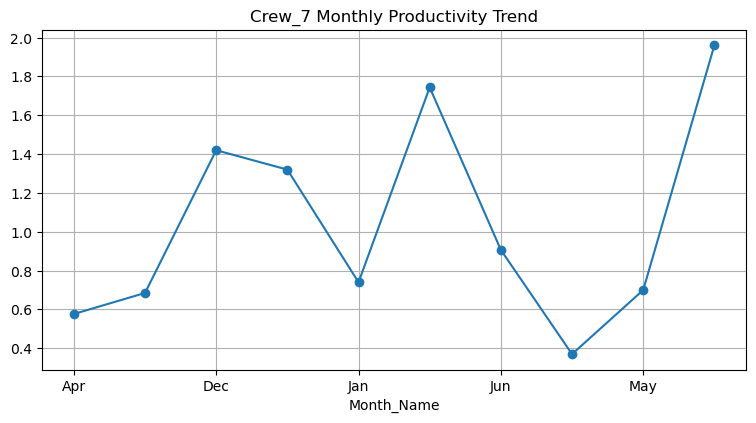

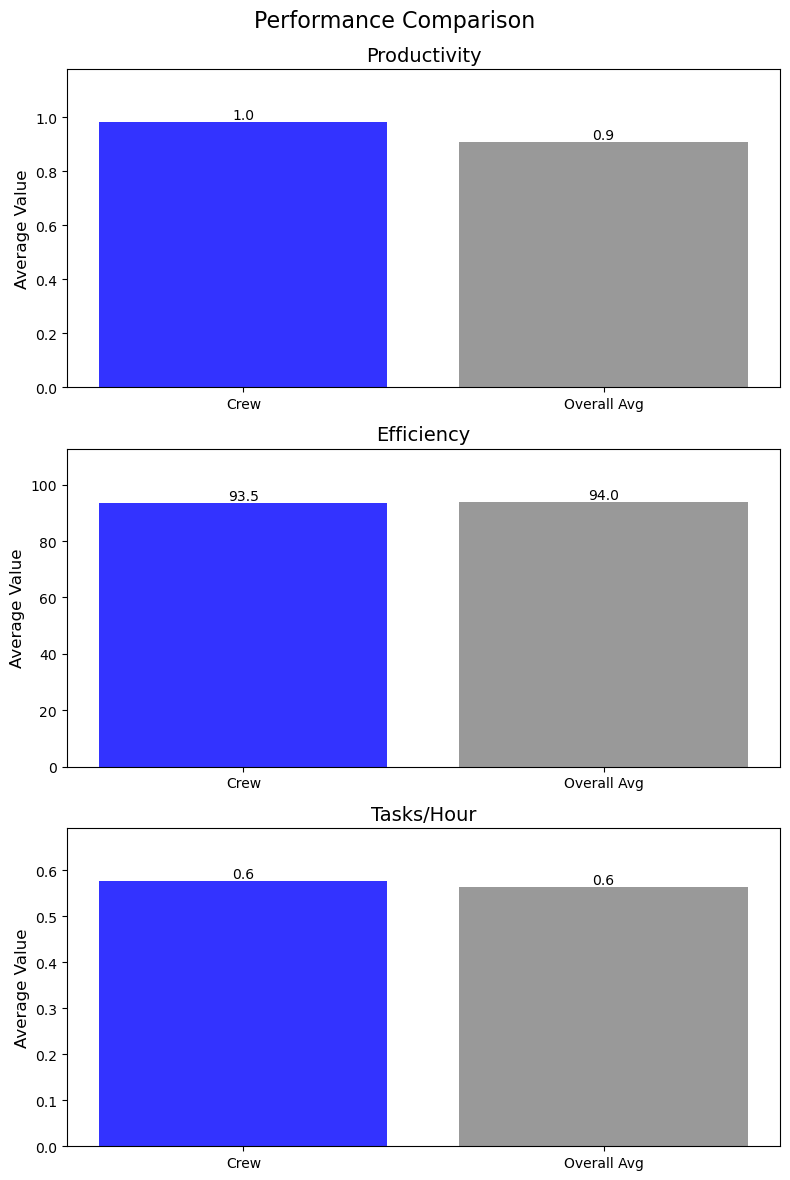

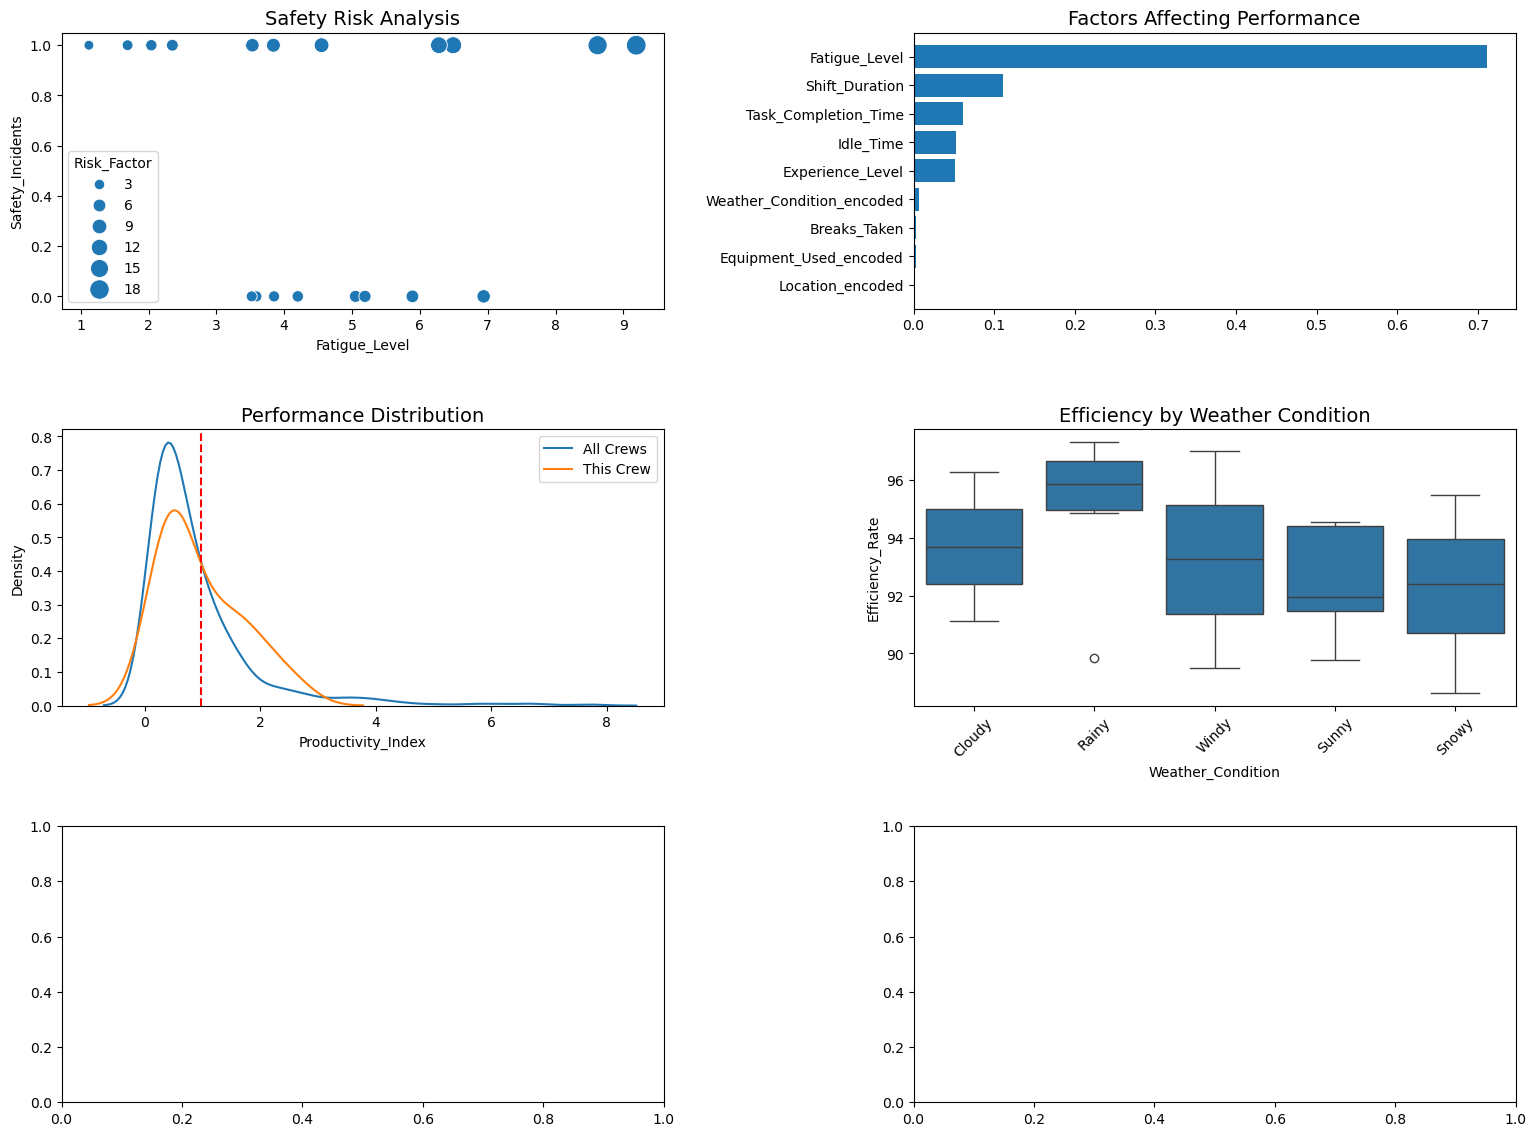


==================== CREW PERFORMANCE ANALYSIS ====================

Crew: Crew_7
Performance Category: Standard Performer

1. PERFORMANCE METRICS
--------------------------------------------------
Overall Productivity Index: 0.98
Average Tasks Per Hour: 0.58
Efficiency Rate (%): 93.46
Risk Factor: 7.06
Experience Level (Years): 10.51
Total Safety Incidents: 11

2. RANKINGS (out of 50 crews)
--------------------------------------------------
Productivity Rank: 19
Efficiency Rank: 40
Safety Rank: 9

3. MONTHLY TRENDS
--------------------------------------------------
            Productivity_Index  Tasks_Per_Hour
Month_Name                                    
Apr                       0.58            0.68
Aug                       0.68            0.48
Dec                       1.42            0.64
Feb                       1.32            0.70
Jan                       0.74            0.36
Jul                       1.74            0.75
Jun                       0.91            0.61
Mar

In [3]:
#code for analysis
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import calendar
import warnings
warnings.filterwarnings('ignore')

class EnhancedCrewAnalyzer:
    def __init__(self, csv_path):
        self.df = pd.read_csv(csv_path)
        self.df, self.le_dict, self.scaled_features = self.preprocess_data()
        self.train_models()
        
    def preprocess_data(self):
        df = self.df.copy()
        
        # Convert dates and calculate derived metrics
        df['Date'] = pd.to_datetime(df['Date'])
        df['Month'] = df['Date'].dt.month
        df['Month_Name'] = df['Date'].dt.month.apply(lambda x: calendar.month_abbr[x])
        
        # Advanced metrics calculation
        df['Tasks_Per_Hour'] = (df['Tasks_Completed'] / (df['Shift_Duration'] / 60)).round(2)
        df['Efficiency_Rate'] = ((1 - (df['Idle_Time'] / df['Shift_Duration'])) * 100).round(2)
        df['Productivity_Index'] = ((df['Tasks_Completed'] * (1 - df['Idle_Time']/df['Shift_Duration'])) / 
                                  (df['Fatigue_Level'] * (df['Safety_Incidents'] + 1))).round(2)
        df['Risk_Factor'] = ((df['Safety_Incidents'] + 1) * df['Fatigue_Level']).round(2)
        
        # Monthly aggregates
        monthly_stats = df.groupby(['Crew_ID', 'Month']).agg({
            'Tasks_Per_Hour': 'mean',
            'Efficiency_Rate': 'mean',
            'Safety_Incidents': 'sum',
            'Productivity_Index': 'mean'
        }).reset_index()
        
        # Label encoding for categorical variables
        le_dict = {}
        categorical_cols = ['Weather_Condition', 'Equipment_Used', 'Location', 'Crew_ID']
        for col in categorical_cols:
            le_dict[col] = LabelEncoder()
            df[f'{col}_encoded'] = le_dict[col].fit_transform(df[col])
        
        # Scale features for modeling
        scaler = StandardScaler()
        features = ['Tasks_Per_Hour', 'Efficiency_Rate', 'Experience_Level', 
                   'Productivity_Index', 'Risk_Factor', 'Breaks_Taken']
        scaled_features = scaler.fit_transform(df[features])
        df_scaled = pd.DataFrame(scaled_features, columns=features)
        
        return df, le_dict, df_scaled

    def train_models(self):
        # Gradient Boosting for productivity prediction
        features = ['Task_Completion_Time', 'Idle_Time', 'Shift_Duration', 
                   'Fatigue_Level', 'Experience_Level', 'Breaks_Taken',
                   'Weather_Condition_encoded', 'Equipment_Used_encoded', 'Location_encoded']
        X = self.df[features]
        y = self.df['Productivity_Index']
        
        self.gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42)
        self.gb_model.fit(X, y)
        self.feature_importance = dict(zip(features, self.gb_model.feature_importances_))
        
        # K-means clustering
        self.kmeans = KMeans(n_clusters=3, random_state=42)
        self.cluster_labels = self.kmeans.fit_predict(self.scaled_features)
        self.df['Performance_Cluster'] = self.cluster_labels
        
        # Calculate cluster characteristics
        cluster_means = self.df.groupby('Performance_Cluster').agg({
            'Productivity_Index': 'mean',
            'Tasks_Per_Hour': 'mean',
            'Efficiency_Rate': 'mean',
            'Risk_Factor': 'mean'
        })
        self.cluster_rankings = cluster_means['Productivity_Index'].rank(ascending=False)
        
        # Autoencoder for anomaly detection
        input_dim = self.scaled_features.shape[1]
        self.autoencoder = self.build_autoencoder(input_dim)
        
    def build_autoencoder(self, input_dim):
        input_layer = Input(shape=(input_dim,))
        encoded = Dense(int(input_dim/2), activation='relu')(input_layer)
        decoded = Dense(input_dim, activation='sigmoid')(encoded)
        
        autoencoder = Model(input_layer, decoded)
        autoencoder.compile(optimizer='adam', loss='mse')
        autoencoder.fit(self.scaled_features, self.scaled_features, 
                       epochs=50, batch_size=32, shuffle=True, verbose=0)
        
        return autoencoder

    def analyze_crew(self, crew_id):
        crew_data = self.df[self.df['Crew_ID'] == crew_id].copy()
        if crew_data.empty:
            return None
            
        results = {}
        
        # 1. Performance Metrics
        crew_stats = {
            'Overall Productivity Index': crew_data['Productivity_Index'].mean().round(2),
            'Average Tasks Per Hour': crew_data['Tasks_Per_Hour'].mean().round(2),
            'Efficiency Rate (%)': crew_data['Efficiency_Rate'].mean().round(2),
            'Risk Factor': crew_data['Risk_Factor'].mean().round(2),
            'Experience Level (Years)': crew_data['Experience_Level'].mean().round(2),
            'Total Safety Incidents': crew_data['Safety_Incidents'].sum()
        }
        
        # 2. Performance Rankings
        all_crews = self.df.groupby('Crew_ID').agg({
            'Productivity_Index': 'mean',
            'Tasks_Per_Hour': 'mean',
            'Efficiency_Rate': 'mean',
            'Risk_Factor': 'mean'
        })
        
        rankings = {
            'Productivity Rank': all_crews['Productivity_Index'].rank(ascending=False),
            'Efficiency Rank': all_crews['Efficiency_Rate'].rank(ascending=False),
            'Safety Rank': all_crews['Risk_Factor'].rank(ascending=True)
        }
        
        crew_rankings = {
            metric: int(ranks[crew_id]) for metric, ranks in rankings.items()
        }
        
        # 3. Trend Analysis
        monthly_trends = crew_data.groupby('Month_Name').agg({
            'Productivity_Index': 'mean',
            'Tasks_Per_Hour': 'mean',
            'Efficiency_Rate': 'mean',
            'Safety_Incidents': 'sum'
        })
        
        # 4. Anomaly Detection
        reconstructed = self.autoencoder.predict(self.scaled_features)
        mse = np.mean(np.power(self.scaled_features - reconstructed, 2), axis=1)
        threshold = np.percentile(mse, 95)
        crew_data['Is_Anomaly'] = mse > threshold
        
        # 5. Performance Category
        cluster = crew_data['Performance_Cluster'].mode()[0]
        cluster_rank = self.cluster_rankings[cluster]
        
        if cluster_rank == 1:
            category = "Top Performer"
        elif cluster_rank == 2:
            category = "Standard Performer"
        else:
            category = "Needs Improvement"
            
        # Create visualizations
        fig = plt.figure(figsize=(20, 15))
        
        # Plot 1: Monthly Performance Trends
        plt.subplot(3, 2, 1)
        monthly_trends['Productivity_Index'].plot(kind='line', marker='o')
        plt.title(f'{crew_id} Monthly Productivity Trend')
        plt.grid(True)
        
        
        # Assuming 'crew_data' and 'self.df' are already defined
        metrics = ['Productivity_Index', 'Efficiency_Rate', 'Tasks_Per_Hour']
        crew_avg = [crew_data[m].mean() for m in metrics]
        overall_avg = [self.df[m].mean() for m in metrics]
        
        # Titles for each metric
        metric_titles = ['Productivity', 'Efficiency', 'Tasks/Hour']
        
        # Initialize subplots (3 separate plots with their own x-axes)
        fig, axes = plt.subplots(3, 1, figsize=(8, 12))  # 3 rows, 1 column
        
        for i, ax in enumerate(axes):
            # Create bars for Crew and Overall Average
            x = ['Crew', 'Overall Avg']  # Separate x-axis for each plot
            values = [crew_avg[i], overall_avg[i]]
            
            bars = ax.bar(x, values, color=['blue', 'gray'], alpha=0.8)
            
            # Add value annotations on bars
            for bar in bars:
                ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height(),
                        f'{bar.get_height():.1f}', ha='center', va='bottom', fontsize=10)
            
            # Title and labels
            ax.set_title(metric_titles[i], fontsize=14)
            ax.set_ylabel('Average Value', fontsize=12)
            ax.set_ylim(0, max(values) * 1.2)  # Adjust y-axis for better visibility
        
        # Add overall title and layout adjustments
        fig.suptitle('Performance Comparison', fontsize=16)
        plt.tight_layout()
        plt.subplots_adjust(top=0.93)  # Adjust space for the main title
        plt.show()
        

        # Assuming crew_data and self.df are already defined
        fig, axs = plt.subplots(3, 2, figsize=(16, 12))  # Adjust the figure size (width, height)
        
        # Plot 1: Safety and Risk Analysis
        plt.subplot(3, 2, 1)
        sns.scatterplot(data=crew_data, x='Fatigue_Level', y='Safety_Incidents', 
                        size='Risk_Factor', sizes=(50, 200))
        plt.title('Safety Risk Analysis', fontsize=14)

        
        # Plot 2: Feature Importance
        plt.subplot(3, 2, 2)
        importance_df = pd.DataFrame(list(self.feature_importance.items()), 
                                     columns=['Feature', 'Importance'])
        importance_df = importance_df.sort_values('Importance', ascending=True)
        plt.barh(importance_df['Feature'], importance_df['Importance'])
        plt.title('Factors Affecting Performance', fontsize=14)
        
        # Plot 3: Performance Distribution
        plt.subplot(3, 2, 3)
        sns.kdeplot(data=self.df, x='Productivity_Index', label='All Crews')
        sns.kdeplot(data=crew_data, x='Productivity_Index', label='This Crew')
        plt.axvline(crew_data['Productivity_Index'].mean(), color='r', linestyle='--')
        plt.title('Performance Distribution', fontsize=14)
        plt.legend()
        
        # Plot 4: Efficiency by Weather Condition
        plt.subplot(3, 2, 4)
        sns.boxplot(data=crew_data, x='Weather_Condition', y='Efficiency_Rate')
        plt.title('Efficiency by Weather Condition', fontsize=14)
        plt.xticks(rotation=45)
        
        # Adjust layout for better spacing
        plt.tight_layout(pad=3.0)  # Add padding between subplots
        plt.show()

        
        return {
            'stats': crew_stats,
            'rankings': crew_rankings,
            'monthly_trends': monthly_trends,
            'anomalies': crew_data['Is_Anomaly'].sum(),
            'category': category,
            'visualization': fig
        }

def main():
    try:
        # Initialize analyzer
        analyzer = EnhancedCrewAnalyzer('crew_performance_data.csv')
        
        # Get available crew IDs
        crew_ids = sorted(analyzer.df['Crew_ID'].unique())
        print("\nAvailable Crew IDs:", ', '.join(crew_ids))
        
        # Get crew ID from user
        while True:
            crew_id = input("\nEnter Crew ID to analyze (e.g., Crew_7): ").strip()
            if crew_id in crew_ids:
                break
            print("Invalid Crew ID. Please try again.")
        
        # Analyze crew
        results = analyzer.analyze_crew(crew_id)
        
        if results:
            print(f"\n{'='*20} CREW PERFORMANCE ANALYSIS {'='*20}")
            print(f"\nCrew: {crew_id}")
            print(f"Performance Category: {results['category']}")
            
            print("\n1. PERFORMANCE METRICS")
            print("-" * 50)
            for metric, value in results['stats'].items():
                print(f"{metric}: {value}")
            
            print("\n2. RANKINGS (out of {total_crews} crews)".format(
                total_crews=len(analyzer.df['Crew_ID'].unique())))
            print("-" * 50)
            for metric, rank in results['rankings'].items():
                print(f"{metric}: {rank}")
            
            print("\n3. MONTHLY TRENDS")
            print("-" * 50)
            print(results['monthly_trends'][['Productivity_Index', 'Tasks_Per_Hour']].round(2))
            
            print("\n4. ANOMALY DETECTION")
            print("-" * 50)
            print(f"Number of anomalous performance days: {results['anomalies']}")
            
            print("\n5. KEY INSIGHTS")
            print("-" * 50)
            # Add specific insights based on the data
            if results['stats']['Efficiency Rate (%)'] < 85:
                print("- Efficiency could be improved by reducing idle time")
            if results['stats']['Risk Factor'] > 5:
                print("- Safety measures should be reviewed")
            if results['stats']['Average Tasks Per Hour'] < analyzer.df['Tasks_Per_Hour'].mean():
                print("- Productivity is below average and needs attention")
            
            # Show visualizations
            plt.show()
            
            # Save results
            output_file = f'{crew_id}_comprehensive_analysis.csv'
            crew_data = analyzer.df[analyzer.df['Crew_ID'] == crew_id]
            crew_data.to_csv(output_file, index=False)
            print(f"\nDetailed results saved to {output_file}")
        
        else:
            print("No data found for the specified crew ID.")
            
    except Exception as e:
        print(f"An error occurred: {str(e)}")

if __name__ == "__main__":
    main()